Salaries by metro and non-metro regions
- https://www.bls.gov/oes/tables.htm
- https://www.bls.gov/oes/current/oes311131.htm
- https://www.bls.gov/oes/current/oes_stru.htm

Occupation employment numbers and educational requirements
- https://www.careeronestop.org/Toolkit/Careers/careers-largest-employment.aspx

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
non_metro_salary_df = pd.read_csv(DATA_DIR/ 'non-postdoc-salary'/ 'BOS_M2020_dl.csv')

In [4]:
metro_salary_df = pd.read_csv(DATA_DIR/ 'non-postdoc-salary'/ 'MSA_M2020_dl.csv')

In [5]:
non_metro_salary_df[:3]

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,100001,Northwest Alabama nonmetropolitan area,6,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,"64,310",2.3,1000.000,1.00,NaN,18.31,"38,080",1.3,9.01,11.30,15.49,21.56,30.06,"18,730","23,500","32,220","44,840","62,520",NaN,NaN
1,100001,Northwest Alabama nonmetropolitan area,6,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,"1,870",4.9,29.113,0.51,NaN,44.16,"91,850",2.6,18.68,28.65,39.56,53.30,76.90,"38,860","59,590","82,290","110,870","159,960",NaN,NaN
2,100001,Northwest Alabama nonmetropolitan area,6,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,60,40.9,0.888,0.61,NaN,*,*,*,*,*,*,*,*,*,*,*,*,*,NaN,NaN


In [6]:
len(non_metro_salary_df), len(metro_salary_df)

(45308, 140051)

In [7]:
metro_salary_df[:20]

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,"66,060",1.9,1000.000,1.00,NaN,20.64,"42,930",1.8,9.13,11.40,16.41,24.82,36.23,"18,990","23,710","34,130","51,620","75,370",NaN,NaN
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,"2,910",4.5,44.068,0.77,NaN,42.87,"89,160",2.2,17.38,26.74,36.37,51.68,73.88,"36,150","55,620","75,640","107,500","153,670",NaN,NaN
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,"1,320",7.4,20.036,1.19,NaN,40.38,"83,990",3.5,12.67,24.02,32.96,50.11,72.93,"26,350","49,960","68,550","104,230","151,700",NaN,NaN
3,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,detailed,90,18.5,1.317,0.47,NaN,58.18,"121,020",7.6,26.23,35.90,52.41,68.01,#,"54,560","74,680","109,000","141,460",#,NaN,NaN
4,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2030,Public Relations and Fundraising Managers,detailed,40,31.5,0.549,0.94,NaN,45.93,"95,540",20.7,28.71,32.78,36.24,41.23,83.81,"59,710","68,180","75,380","85,760","174,320",NaN,NaN
5,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-3010,Administrative Services and Facilities Managers,detailed,140,12.3,2.045,0.92,NaN,37.79,"78,600",3.5,24.93,28.28,35.06,45.45,55.25,"51,850","58,820","72,920","94,530","114,920",NaN,NaN
6,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-3021,Computer and Information Systems Managers,detailed,70,30.2,1.054,0.32,NaN,59.15,"123,040",8.5,26.29,35.72,56.28,71.04,97.75,"54,690","74,310","117,060","147,760","203,330",NaN,NaN
7,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-3031,Financial Managers,detailed,120,8.8,1.883,0.40,NaN,57.49,"119,580",9.6,25.74,34.93,46.19,62.85,#,"53,540","72,650","96,080","130,730",#,NaN,NaN
8,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-3051,Industrial Production Managers,detailed,50,22.3,0.761,0.59,NaN,54.65,"113,680",12.0,29.20,36.76,47.44,64.49,84.92,"60,730","76,460","98,680","134,140","176,630",NaN,NaN
9,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-3071,"Transportation, Storage, and Distribution Mana...",detailed,60,18.6,0.890,0.94,NaN,40.88,"85,030",3.8,30.53,34.41,39.63,47.38,51.38,"63,500","71,580","82,430","98,550","106,880",NaN,NaN


### Join metro and non-metro

In [8]:
metro_salary_df = pd.concat([metro_salary_df, non_metro_salary_df])

### get salary data as integers

In [34]:
def strip_name(name):
    return ''.join(filter( lambda x: x in '0123456789abcdefghijklmnopqrstuvwxyz', name.lower()))

In [35]:
def get_int(x):
    try:
        return int(strip_name(x))
    except:
        return np.nan

In [36]:
metro_salary_df.A_MEAN.values

array(['42,930', '89,160', '83,990', ..., '20,590', '17,540', '21,950'],
      dtype=object)

In [37]:
metro_salary_df["mean_annual"] = [get_int(i) for i in metro_salary_df.A_MEAN.values]
metro_salary_df["median_annual"] = [get_int(i) for i in metro_salary_df.A_MEDIAN.values]
metro_salary_df["tot_emp"] = [get_int(i) for i in metro_salary_df.TOT_EMP.values]

### Get median salary across occupations

In [39]:
metro_area_median = metro_salary_df[metro_salary_df.OCC_TITLE == "All Occupations"][
    ["AREA", "AREA_TITLE", "median_annual", "mean_annual"]
]

### Scale with the cost of living

In [40]:
cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison-2020.csv', skiprows=4)
cost_of_living_df['RPP'] = cost_of_living_df['2020']
cost_of_living_df = cost_of_living_df[cost_of_living_df.Description == 'RPPs: All items']

In [41]:
cost_of_living_df["GeoFips"] = cost_of_living_df.GeoFips.values.astype(int)

In [42]:
cost_of_living_df[:3]

,GeoFips,GeoName,LineCode,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,RPP
0,0,United States,1.0,RPPs: All items,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
5,999,United States (Nonmetropolitan Portion),1.0,RPPs: All items,87.129,87.385,89.244,88.970,89.077,89.427,89.256,89.066,88.201,87.918,89.485,89.599,89.005,89.005
10,10180,"Abilene, TX (Metropolitan Statistical Area)",1.0,RPPs: All items,93.481,91.098,94.866,93.792,94.444,92.318,95.511,94.226,94.938,94.742,93.791,92.865,94.443,94.443


In [43]:
metro_area_median = metro_area_median.merge(cost_of_living_df[["RPP", "GeoFips"]], left_on = "AREA", right_on = "GeoFips")

In [44]:
metro_area_median['mean_scaled'] = metro_area_median.mean_annual/(metro_area_median.RPP/100)

In [45]:
metro_area_median['median_scaled'] = metro_area_median.median_annual/(metro_area_median.RPP/100)

In [46]:
metro_area_median.sort_values(by='median_scaled', ascending=False)[:30]

,AREA,AREA_TITLE,median_annual,mean_annual,RPP,GeoFips,mean_scaled,median_scaled
47,15680,"California-Lexington Park, MD",63750.0,73810.0,96.753,15680,76287.040195,65889.429785
296,41940,"San Jose-Sunnyvale-Santa Clara, CA",69620.0,93450.0,112.122,41940,83346.711618,62093.077184
348,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",60480.0,77210.0,111.532,47900,69226.768999,54226.589678
40,14500,"Boulder, CO",54770.0,70450.0,102.579,14500,68678.774408,53392.994668
331,45940,"Trenton, NJ",55220.0,69450.0,103.804,45940,66904.936226,53196.408616
96,20500,"Durham-Chapel Hill, NC",49460.0,64430.0,93.834,20500,68663.810559,52710.105079
295,41860,"San Francisco-Oakland-Hayward, CA",61790.0,81840.0,117.369,41860,69728.804028,52645.928652
304,42660,"Seattle-Tacoma-Bellevue, WA",58330.0,74330.0,111.951,42660,66395.119293,52103.152272
277,40340,"Rochester, MN",47310.0,62710.0,94.734,40340,66195.874765,49939.831528
108,21820,"Fairbanks, AK",50660.0,58450.0,103.815,21820,56302.075808,48798.343207


In [47]:
metro_area_median.to_pickle(DATA_DIR/ 'median_salary_by_area.pickle')

In [48]:
metro_area_median.median_scaled

0      36138.199761
1      43501.177888
2      38770.132464
3      39127.740565
4      47508.898571
           ...     
361    39763.730311
362    41436.918772
363    39570.275485
364    40060.301508
365    36508.115419
Name: median_scaled, Length: 366, dtype: float64

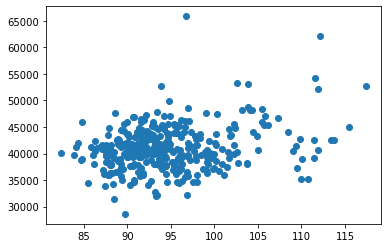

In [49]:
plt.scatter(metro_area_median.RPP, metro_area_median.median_scaled)

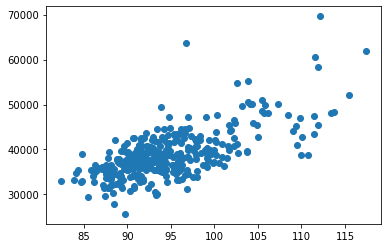

In [50]:
plt.scatter(metro_area_median.RPP, metro_area_median.median_annual)

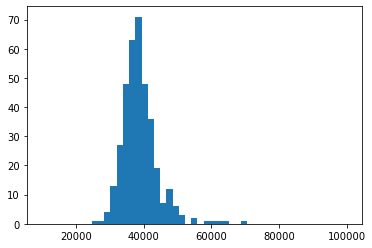

In [51]:
plt.hist(metro_area_median.median_annual.values, bins = np.linspace(10000, 100000, 50));